# Communicate Findings About Loan Data from prosper
## by (Vedavyas Kamath)

## Preliminary Wrangling

> The dataset for Loans from prosper contains records for 113,917 loans that were sanctioned between November 2005 to March 2014. The main purpose of this project is to first explore and then summarize the nature of different variables present in the dataset that seem to affect the status of the loan and also about the relationship among multiple variables using data visualizations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import data from csv as a dataframe in python using pandas
df_loans = pd.read_csv('prosperLoanData.csv')
df_loans.shape

(113937, 81)

In [3]:
#View values for all columns of the 1st 5 entries in the dataset 
pd.set_option('display.max_columns', 100)
df_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
#Overview of all the columns in the dataset, checking for datatype and missing values(null)
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
#See the summary statistics for each of the numeric variables in dataset
df_loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [6]:
#Check the range of years for which we have data in dataset
print(df_loans['LoanOriginationDate'].min())
print(df_loans['LoanOriginationDate'].max())

2005-11-15 00:00:00
2014-03-12 00:00:00


In [7]:
# check for duplicated data entries
sum(df_loans.duplicated())

0

In [8]:
# Check for null values in each columns
df_loans.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
#We can see 29084 entries where prosper score is null:
# Remove entries for loans with null ProsperScores as this is one of the most important features in the dataset
df = df_loans[df_loans['ProsperScore'].isnull()==False]

In [10]:
#Check number of rows in data after removing entries with null values of ProsperScore
df.shape

(84853, 81)

### What is the structure of your dataset?

> The dataset contains a total of 113937 entries for loans along with 81 attributes for each loan. Each loan contains loan details like (Status, Principal, period of loan, APR) along with the borrowerer's background details like (occupation, income, employment status, Available Credit Limit, Income range).

### What is/are the main feature(s) of interest in your dataset?

> The main feature in the dataset that caught my eye were LoanStatus, BorrowerRate, ProsperScore variable. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main features in the dataset seem to be the IncomeRange, ProsperScore, CreditScore (Upper and lower), AvailableBankCredit, Occupation & Employment Status, Home Ownership which we can expect to have an effect on a loand being defulted!

## Univariate Exploration

## 1.  Top 10 occupations  of borrowers

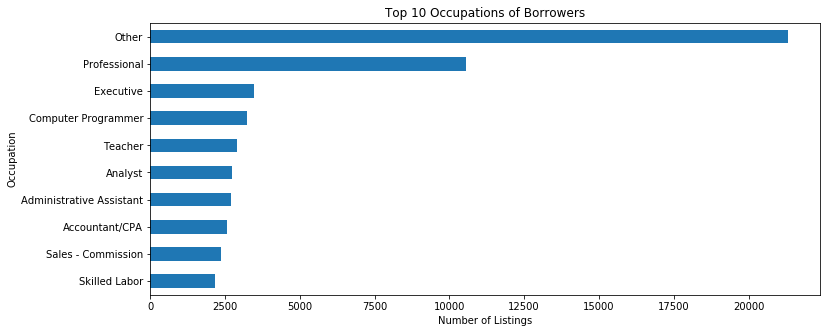

In [12]:
#set the figure size:
plt.figure(figsize = [12, 5])

#Plot a horizontal bar chart for top 10 occupations with highest counts:
df['Occupation'].value_counts()[9::-1].plot(kind='barh')

#Set the x-label, y-label, chart title and font size:
plt.title('Top 10 Occupations of Borrowers')
plt.xlabel('Number of Listings')
plt.ylabel('Occupation')
plt.fontsize = 13

#### Insights:
> From the plot, we can see that most number of listings are by people who belonged to 'Other' occupations followed by 'Professional'. 
> The reason for people selecting occupation as 'Others' may be justified by below 2 points:
  1. These people may have been doing odd jobs which are not mainstream occupations that people take up.
  2. People may not want to disclose their actual occupation and so have listed it as 'Other'.

## 2. Distribution of Income Range of Borrowers

In [13]:
#Check value counts for all values included in income range column:
income_range = df['IncomeRange'].value_counts()
print(income_range)

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64


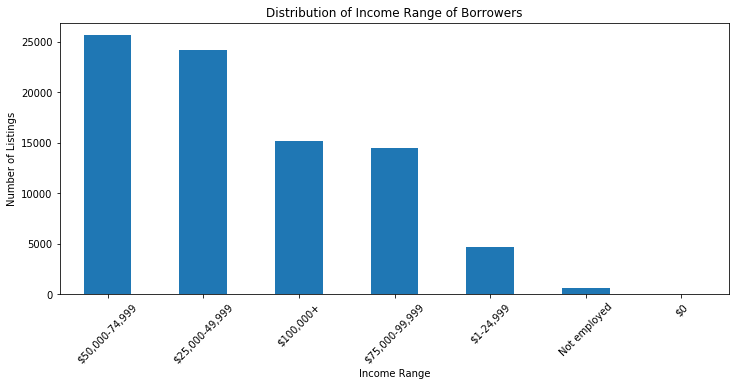

In [14]:
#set the color and figure size
color = sb.color_palette()[0]
plt.figure(figsize = [12, 5])

#plot a bar chart for income range by using the values and counts stored above:
income_range.plot(kind='bar', color=color);

#Set the x-label, y-label, chart title and font size:
plt.title('Distribution of Income Range of Borrowers');
plt.xlabel('Income Range');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.fontsize = 13;

#### Insights:
> From the plot, we can see that most listings fall for bowrrowers having income between USD 25,000 & 50,000. This is followed by USD 50000-74999 and so on. The highest number of listings are by people in these 2 income ranges. We see that for higher income ranges, i.e USD 75,000 and above, the number of listings is less. This maybe justified by the fact that people who have a high income may not feel the need to take loans as they already have sufficient funds available with them.

## 3. Count of listings by state:

In [15]:
#Check value counts for all the states included in BorrowerState column:
states_count = df['BorrowerState'].value_counts()
print(states_count)

CA    10761
NY     5844
TX     5634
FL     5406
IL     4264
OH     3373
GA     3347
VA     2779
NJ     2725
PA     2678
MI     2622
NC     2439
MD     2241
WA     2153
MA     1831
MO     1793
CO     1729
MN     1715
IN     1652
TN     1538
WI     1521
CT     1492
AZ     1357
OR     1214
AL     1187
NV     1024
SC      994
KY      888
KS      854
LA      841
AR      769
OK      732
MS      675
NE      555
UT      522
NH      443
RI      409
ID      403
HI      342
NM      331
DC      328
WV      310
DE      267
MT      221
SD      189
VT      171
AK      167
WY      123
Name: BorrowerState, dtype: int64


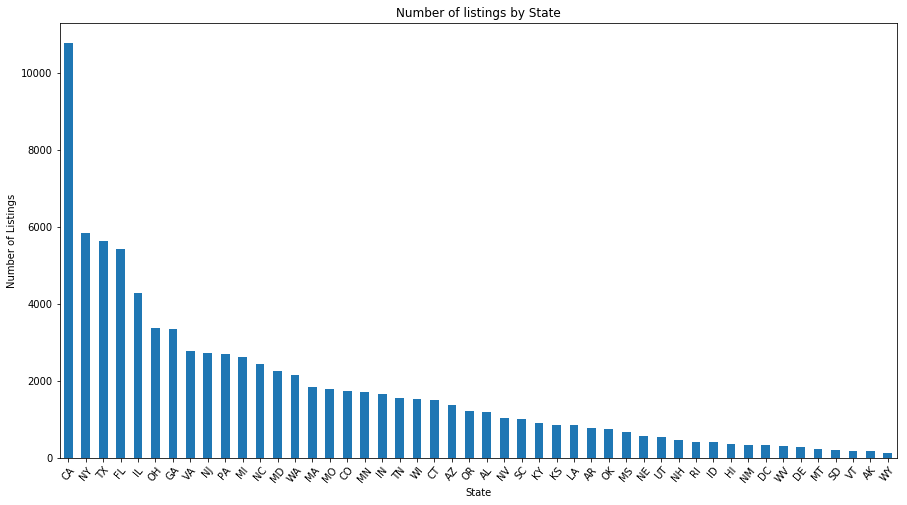

In [16]:
#set the color and figure size:
color = sb.color_palette()[0]
plt.figure(figsize=(15, 8))

#Plot a bar chart for all states with their respective counts:
states_count.plot(kind='bar', color=color);

#Set the x-label, y-label, chart title and font size:
plt.title('Number of listings by State');
plt.xlabel('State');
plt.ylabel('Number of Listings');
plt.xticks(rotation=50);
plt.fontsize = 13

#### Insights:
> From the plot, we can see that most number of listings were in the state of California followed by next state NY. This maybe due to the fact that there are a lot of Universities in the state of California along with the Silicon Valley which is based in this state. So we can expect a lot of students to apply for loans prior to enrolling into their courses in these Universities along with businessmen who may take loans to fund their tech startups!

## 4. Distribution of ProsperScore:

In [17]:
#Check counts for all values of ProsperScore column in dataset:
df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

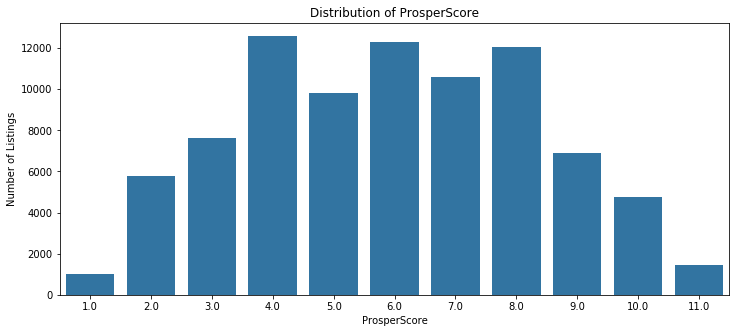

In [18]:
#set the color and figure size:
plt.figure(figsize = [12, 5])
color = sb.color_palette()[0]

#plot a bar chart for all values of prosper score included in the dataset which was stored in the variable above:
sb.countplot(data = df, x = 'ProsperScore', color = color);

#Set the x-label, y-label, chart title and font size:
plt.title('Distribution of ProsperScore')
plt.ylabel('Number of Listings')
plt.xlabel('ProsperScore')
plt.fontsize = 13


#### Insights:
> From the plot, we can see that most number of listings had a ProsperScore of 4.0, 6.0 and 8.0 respectively. Overall we can say that maximum number of listings were in the range of 4.0 to 8.0


## 5. Number of Listings by Loan Status:

In [19]:
#Check counts for different values of LoanStatus column in dataset:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [21]:
#Defining a variable to set the order in which the levels should be plotted for better understanding:
status_order = ['Current','Completed','FinalPaymentInProgress','Chargedoff','Defaulted','Past Due (1-15 days)',
'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']

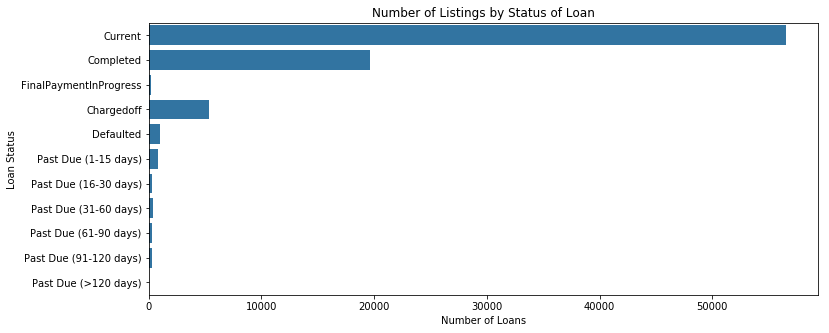

In [22]:
#set the color and figure size:
plt.figure(figsize = [12, 5])
color = sb.color_palette()[0]

#Plot a horizontal bar chart with counts of all values of loan status present in the dataset by setting the order of levels 
#as defined above:
sb.countplot(data = df, y = 'LoanStatus', order =status_order, color = color);

#Set the x-label, y-label, chart title and font size:
plt.title('Number of Listings by Status of Loan')
plt.xlabel('Number of Loans')
plt.ylabel('Loan Status')
plt.fontsize = 13

#### Insights:
> The number of listings for each Loan Status can be seen in the plot above which shows that maximum number of listings are Currently ongoing followed by Completed listings and Chargedoff listings. Other statuses which include dues for various intervals, along with cancelled listings are very few in number.

## 6. Distribution of AvailableBankcardCredit 

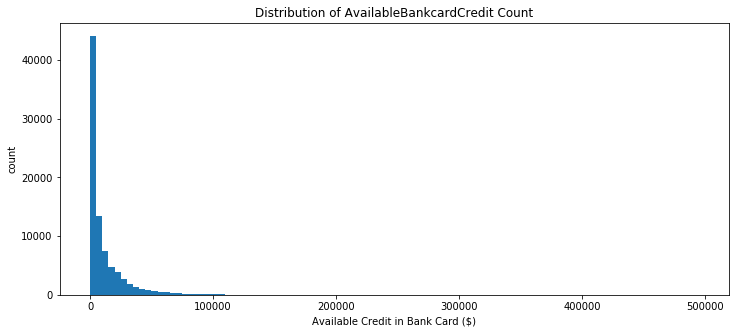

In [23]:
#set thefigure size:
plt.figure(figsize = [12, 5])

#plotting a histogram for whole range of values present in the dataset for AvailableBankcardCredit variable to see
#the overall distribution
bins = np.arange(0, df['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = df, x = 'AvailableBankcardCredit', bins = bins)

#Set the x-label, y-label, chart title and font size:
plt.title('Distribution of AvailableBankcardCredit Count')
plt.xlabel('Available Credit in Bank Card ($)')
plt.ylabel('count');
plt.fontsize = 13

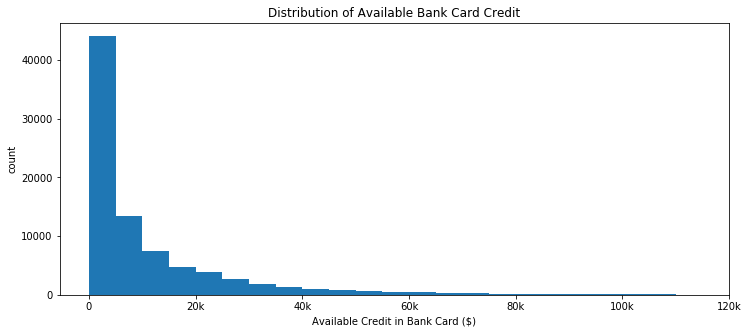

In [24]:
#set thefigure size:
plt.figure(figsize = [12, 5])

#As we can see majority lies between 0 and 100k, zoom into data by changing the range and ticks:
#changed the bins to show data till 120k only
bins = np.arange(0, 115000, 5000)
plt.hist(data = df, x = 'AvailableBankcardCredit', bins = bins)

#changed the values displayed on x-axis to show values from 0 to $120,000
plt.xticks([0, 2e4, 4e4, 6e4, 8e4, 1e5, 1.2e5],
           [0, '20k', '40k', '60k', '80k', '100k', '120k'])

#Set the x-label, y-label, chart title and font size:
plt.title('Distribution of Available Bank Card Credit')
plt.xlabel('Available Credit in Bank Card ($)')
plt.ylabel('count');
plt.fontsize = 13

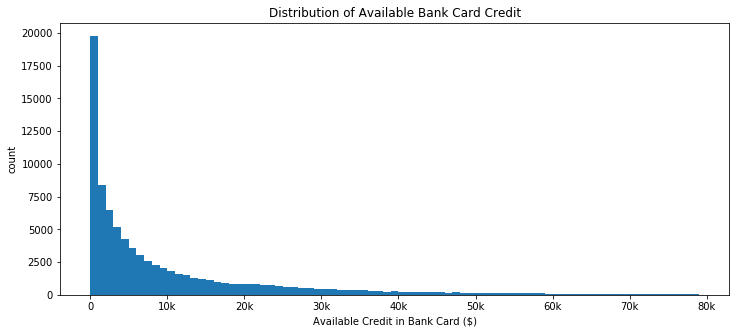

In [25]:
#set thefigure size:
plt.figure(figsize = [12, 5])

#Further could see majority lies between 0 and $60,000. Thus, zooming further into data by changing the range and ticks:
#changed the bins to see data only uptill $80,000
bins = np.arange(0, 80000, 1000)
plt.hist(data = df, x = 'AvailableBankcardCredit', bins = bins)

#changed values to displayed on x axis from 0 to $80,000
plt.xticks([0, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4],
           [0, '10k', '20k', '30k', '40k', '50k', '60k','70k','80k'])

#Set the x-label, y-label, chart title and font size:
plt.title('Distribution of Available Bank Card Credit')
plt.xlabel('Available Credit in Bank Card ($)')
plt.ylabel('count');
plt.fontsize = 13

#### Insights:
> From the plot we can conclude that this variable is heavily right-skewed. Initially, we could see that the available bank credit for most of the borrowers at time the credit was pulled is  between USD 0 and 20,000. Upon further zooming into the data could see that USD 0 to 1000 is the available bank credit card for most of the people when their profiles were pulled!

## 7. Distribution of Credit Score range (Upper and Lower):

In [26]:
#Check overall distribution of lower bound of credit score:
df['CreditScoreRangeLower'].describe()

count    84853.000000
mean       699.390240
std         47.095937
min        600.000000
25%        660.000000
50%        700.000000
75%        720.000000
max        880.000000
Name: CreditScoreRangeLower, dtype: float64

In [27]:
#Check overall distribution of upper bound of credit score:
df['CreditScoreRangeUpper'].describe()

count    84853.000000
mean       718.390240
std         47.095937
min        619.000000
25%        679.000000
50%        719.000000
75%        739.000000
max        899.000000
Name: CreditScoreRangeUpper, dtype: float64

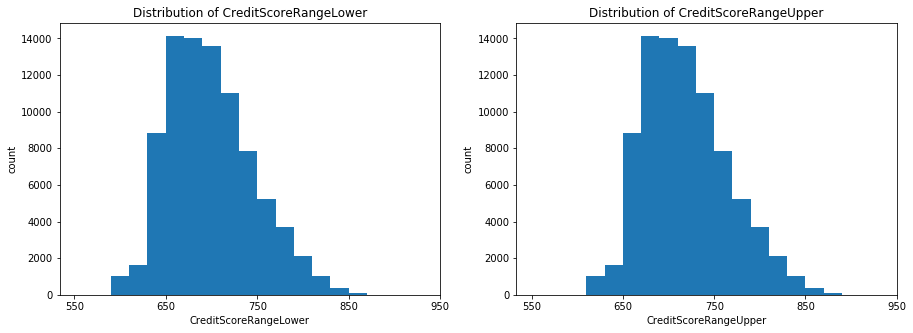

In [28]:
#set thefigure size:
plt.figure(figsize = [15, 5])

#plotting 2 plots side by side 1st one showing histogram for lower bound of Credit Score and 2nd showing for upper bound:

plt.subplot(1, 2, 1)  #Code to plot the histogram plot for CreditScoreRangeLower on left side (1st plot)
bins = np.arange(550, df['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
#Set the x-label, y-label, chart title and font size:
plt.title('Distribution of CreditScoreRangeLower')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');
plt.fontsize = 13

plt.subplot(1, 2, 2)  #Code to plot the histogram plot for CreditScoreRangeLower on the right side (2nd plot)
bins = np.arange(550, df['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
#Set the x-label, y-label, chart title and font size:
plt.title('Distribution of CreditScoreRangeUpper')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');
plt.fontsize = 13

#NOTE: Keeping the same scale on X-axis i.e. bins & values displayed to be able to compare both variables easily

#### Insights:
> We can see that distributions for both uper and lower credit score show simillar trends. Both distributions are slightly right-skewed with the most frequent value being in the range of 650 to 710 for lower bound of credit score and 670 to 730 for the upper bound of credit score.

## Bivariate Exploration

## 1. Relationship between Prosper Score and Loan Status:

In [29]:
#defining the order of levels in the LoanStatus variable to be able to understand the insights easily.
status_order = ['Current','Completed','FinalPaymentInProgress','Chargedoff','Defaulted','Past Due (1-15 days)',
'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']

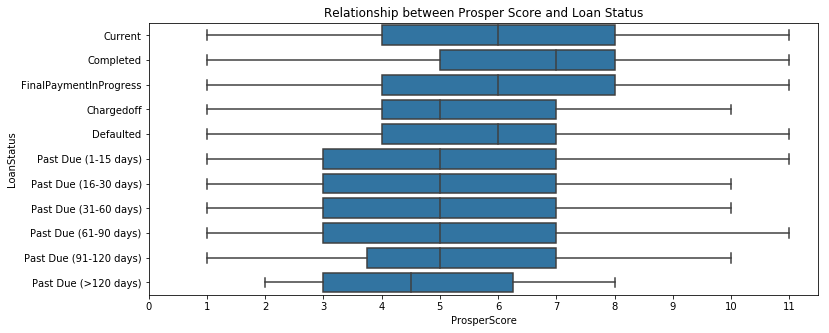

In [30]:
#set thefigure size and color:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

#Plot the box plot for different values of Loan Status against the ProsperScore in order of levels defined above:
sb.boxplot(data = df, x = 'ProsperScore', y = 'LoanStatus', color = base_color, order = status_order);

#Set the values to be displayed on axis as per range of valus in ProsperScore variable in dataset i.e. (1 to 11)
plt.xticks(np.arange(0, 11+1, 1));

#Set the x-label, y-label, chart title and font size:
plt.xlabel('LoanStatus')
plt.ylabel('ProsperScore')
plt.title('Relationship between Prosper Score and Loan Status')
plt.fontsize = 13

#### Insights:
> From this plot we can say that borrowers with higher prosper ratings tended to complete the loan without defaulting.
> We see a higher median of prosper score for people who completed he loan. Thus, people with lower prosper ratings are more likely to not pay back the loan in time. Borrowers who have not paid the loan past due date more than 120 days seem to have the lowest range of prosper rating.

## 2. Change in Interest rate (BorrowerRate) over time:

In [31]:
#We see that ListingCreationDate is a string object and not a datetime object:
#since dataset has data over the years, it is best to showcase the change in interest rates over the years.
#Thus, extracting only the year from the ListingCreationDate column and saving it as a new column in the dataset.
df['year'] = df['ListingCreationDate'].str.split('-').str[0]

C:\Users\Vedvyas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
#Check if the new column 'year' is included correctly in dataset
df.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,year
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.0,2.0,0.18,"$50,000-74,999",True,6125.0,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014


In [33]:
#Check for count of all distinct years in the newly added year column in dataset:
df['year'].value_counts()

2013    35413
2012    19556
2011    11442
2014    10734
2010     5530
2009     2178
Name: year, dtype: int64

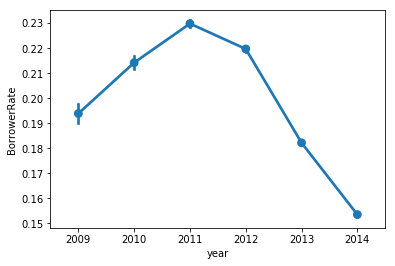

In [34]:
#Building a point plot to see how Interest Rate is varying with respoect to time (year) variable:
sb.pointplot(data=df, x='year', y='BorrowerRate');

#### Note: 
> In my initial data exploration, saw that dataset contains records from 2005 to 2014 however in this plot data only from 2009 to 2014 is being shown because I had removed entries with Null prosper rating from the dataset.
> Thus, using the original dataset in this plot to understand the trend of interest rates from 2005 to 2014.

In [35]:
#Adding the year column in the original dataset that was loaded prior to removing entries with null ProsperScore values:
df_loans['year'] = df_loans['ListingCreationDate'].str.split('-').str[0]

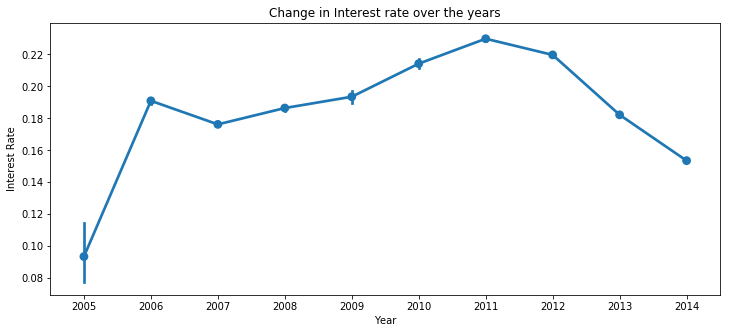

In [36]:
#set the figure size:
plt.figure(figsize = [12, 5])

#Building a line plot using counts of disitinct year values calculated as before:
sb.pointplot(data=df_loans, x='year', y='BorrowerRate');

#Set the x-label, y-label, chart title and font size:
plt.xlabel('Year');
plt.ylabel('Interest Rate');
plt.title('Change in Interest rate over the years');
plt.fontsize = 13

#### Insights:
> From the above plot, we can see that the interest rate was very low initially in 2005 and shot up exponentially in 2006. Then in 2007 there was a slight drop in the rate after which the interest rates began to climb steadily untill 2011. The highest interest rate observed was in 2011. The rates then began to fall down steadily from 2012 onwards till 2014.

## 3. Relationship between AvailableBankcardCredit and BorrowerRate

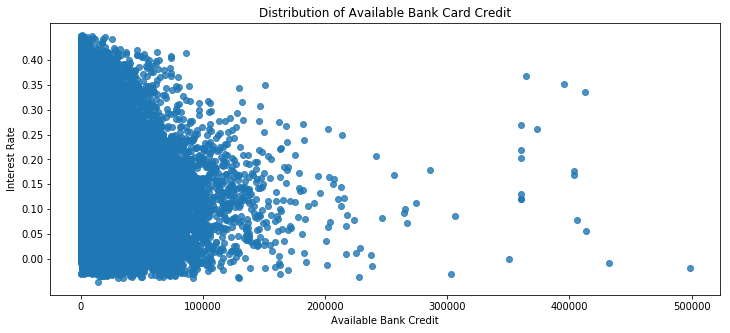

In [37]:
#set the figure size:
plt.figure(figsize = [12, 5])

#Building a scatter plot to see relation between 2 numeric variables: Interest rate & Available bank credit:
sb.regplot(data = df, x = 'AvailableBankcardCredit', y = 'BorrowerRate', y_jitter = 0.1, x_jitter = 0.1,fit_reg = False);

#set the values to be displayed on Y-axis:
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.40]);
   

#Set the x-label, y-label, chart title and font size:
plt.xlabel('Available Bank Credit');
plt.ylabel('Interest Rate');  
plt.title('Distribution of Available Bank Card Credit') 
plt.fontsize = 13

In [42]:
#AvailableBankCredit data seems to be heavily right skewed with majority of points being in the range of 0-$150,000 
#and rest being outliers.

#Filter out data where available bank credit is less than 150k only, so that the trend can be observed more clearly

df_2 = df.query('AvailableBankcardCredit < 150000')

In [43]:
#checking the number of rows in the newly filtered dataset for comparison:
df_2.shape

(84739, 82)

In [44]:
df.shape

(84853, 82)

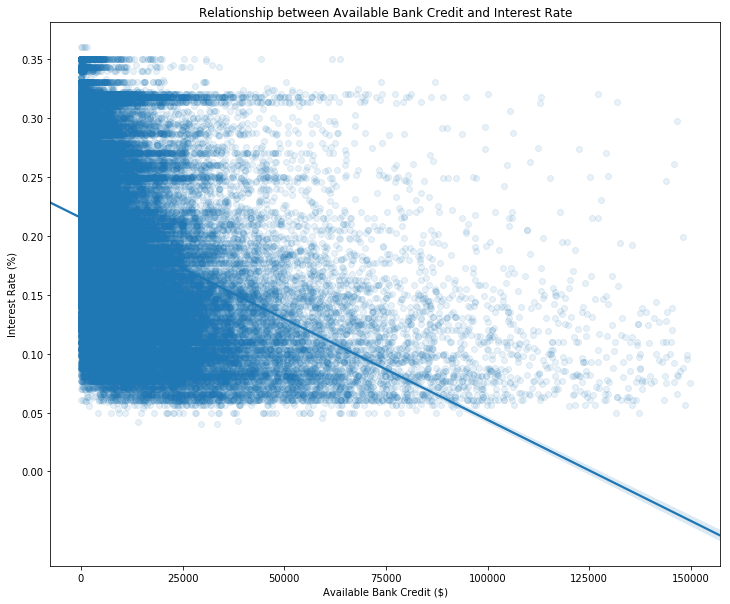

In [45]:
#set the figure size:
plt.figure(figsize = [12, 10])

#Built a regression plot with a regression line so that the trend can be easily observed:
#as there were a lot of points in the range of 0-$50,000, added some transperency by setting 'alpha' parameter
sb.regplot(data = df_2, x = 'AvailableBankcardCredit', y = 'BorrowerRate',   fit_reg = True, scatter_kws = {'alpha':0.1});
 
#Set the values to be dsiplayed on x-axis and y-axis so that data is displayed clearly:
plt.yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.35]);
plt.xticks([0, 25000, 50000, 75000, 100000, 125000, 150000]);

#Set the x-label, y-label and chart title and font-size:
plt.title('Relationship between Available Bank Credit and Interest Rate')    
plt.xlabel('Available Bank Credit ($)');
plt.ylabel('Interest Rate (%)'); 
plt.fontsize = 13

#### Insights: 
> It is clear from the plot and the slope of the regression line that there is a negative co-relation between the Available Bank Credit and the Interest rate. Borrowers having high amount of bank credit are given loans at lower interest rates as compared to people with lower interest rates who are charged a higher rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Could see that ProsperScore did infact have a relation in deciding whether or not a loan was going to be defaulted. It was observed that borrowers with a higher ProsperScore tended to pay back the loans back in time without defaulting. 
> Simillarly, as expected by logically thinking, could see that borrowers with a higher available bank credit were seen to be getting loans at a compartively lesser interest rate.



## Multivariate Exploration


## 1. Comparison of Interest Rates by Employment Status & Home Ownership

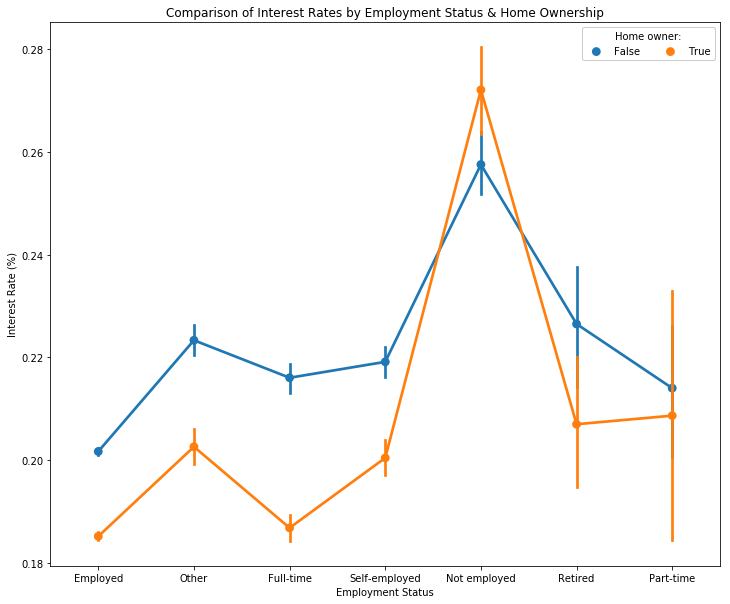

In [46]:
#set the figure size:
plt.figure(figsize = [12, 10])

#Plotted a line plot so that Interest Rates for different levels of Employment status are displayed clearly for 
#both values of Homeowners as well as non-home owners:
#selected homeowner variable to be displayed through colour encoding because it would be easy to interpret 
#as it has only 2 distinct levels.
ax = sb.pointplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');

#set the legend to be displayed with values for Home Owner variable:
ax.legend(ncol = 3, framealpha = 1, title = 'Home owner:');

#Set the x-label, y-label and chart title and fontsize:
plt.xlabel('Employment Status')
plt.ylabel('Interest Rate (%)')
plt.title('Comparison of Interest Rates by Employment Status & Home Ownership')
plt.fontsize = 13

#### Insights:
1. From the above plot, we can clearly see that the interest rates are highest for Unemployed Borrowers and the least for borrowers who are Employed. 
2. Borrowers who are Unemployed, Retired or have mentioned status as others are given loans with comparitively higher interest rates as compared to the borrowers in other categories.
3. We can see a simillar trend for  house owners as well as non-house owners, except for Borrowers who are Unemployed.
4. We can see that except for Unemployed borrowers, borrowers who are house-owners are charged lower interest rates as compared to non-house owners.
5. Only those house owners who are unemployed seem to be getting loans at higher interest rates.

## 2. Comparison of Available Bank Card Credit amount by Employment Status & Home Ownership

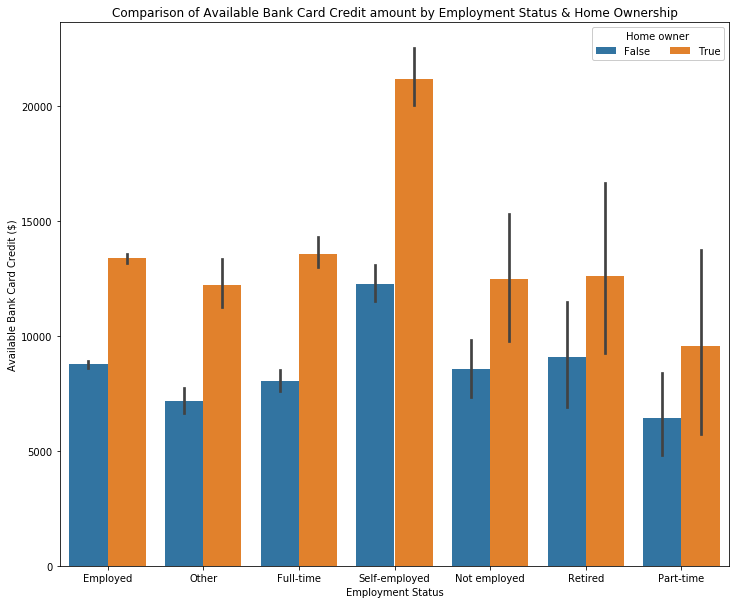

In [47]:
#set the figure size:
plt.figure(figsize = [12, 10])

#Plotted a line plot so that Available Bank Credit for different levels of Employment status are displayed clearly for 
#both values of Homeowners as well as non-home owners:
#selected homeowner variable to be displayed through colour encoding because it would be easy to interpret 
#as it has only 2 distinct levels.
ax = sb.barplot(data = df, x = 'EmploymentStatus', y = 'AvailableBankcardCredit', hue = 'IsBorrowerHomeowner');

#set the legend to be displayed with values for Home Owner variable:
ax.legend(ncol = 3, framealpha = 1, title = 'Home owner');

#Set the x-label, y-label and chart title:
plt.xlabel('Employment Status')
plt.ylabel('Available Bank Card Credit ($)')
plt.title('Comparison of Available Bank Card Credit amount by Employment Status & Home Ownership')
plt.fontsize = 13

#### Insights:
1. The overall trend looks to be the same for Home-owners as well as non-home owners.
2. We can see that the Self-Employed borrowers seem to have the highest amount of Bank Card Credit Available and Part-Time working borrowers having the least.
3. We can also see that borrowers who are Home-Owners tend to have a higher available bank credit as compared to Non-Home owners.

## Corelation Plot Using Heat Map

In [23]:
#Creating a subset of the main dataframe with only selected columns for which we want to observe relationship:
df_new = df[['BorrowerRate', 'BorrowerAPR', 'EstimatedLoss','AvailableBankcardCredit','IsBorrowerHomeowner', 'CreditScoreRangeUpper','ProsperScore']]
df_new.head()

,BorrowerRate,BorrowerAPR,EstimatedLoss,AvailableBankcardCredit,IsBorrowerHomeowner,CreditScoreRangeUpper,ProsperScore
1,0.0920,0.12016,0.0249,10266.0,False,699.0,7.0
3,0.0974,0.12528,0.0249,30754.0,True,819.0,9.0
4,0.2085,0.24614,0.0925,695.0,True,699.0,4.0
5,0.1314,0.15425,0.0449,86509.0,True,759.0,10.0
6,0.2712,0.31032,0.1275,1929.0,False,699.0,2.0


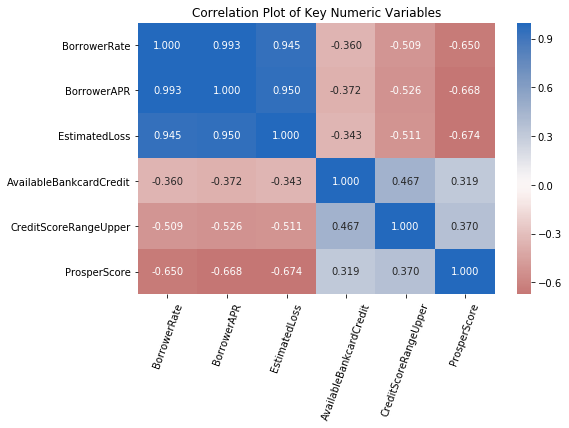

In [34]:
# correlation plot using Heat-Map:

#Created a list of numeric variables only that need to be checked for co-relation with other variables:
numeric_vars = ['BorrowerRate', 'BorrowerAPR', 'EstimatedLoss','AvailableBankcardCredit','CreditScoreRangeUpper','ProsperScore']

#set the figure size
plt.figure(figsize = [8, 5])

#Plotted the heat map by subsetting the newly subseted df by passing only the numeric variables listed above
sb.heatmap(df_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

#Rotated the values on x-axis slight for easier understanding:
plt.xticks(rotation = 70);

#Set the fontsize plot title:
plt.fontsize = 13
plt.title('Correlation Plot of Key Numeric Variables') 
plt.show()

#### Insights:
1. From the above we can see a strong positive co-relation between Interest Rate, APR and the Estimated Loss variables. This shows that the for Higher Interest rate, the APR is also high but is expected to make more loss also. This could be the reason why we are seeing a fall in the interest rates over the years.

2. We also saw positive co-relation (not very strong) i.e. low to moderate between Prosper Score Credit Score and the Available Bank credit. This was expected as borrowers with high bank credit available will also tend to NOT default while making payments and would end up having a higher Credit Score.

3. We observed negative corelation of Estimated Loss with ProsperScore, CreditScore and AvailableBankCredit. This makes sense as borrowers with financially sound background are likely to pay of the loan in time and not be charged-off.

## Plot Matrix 

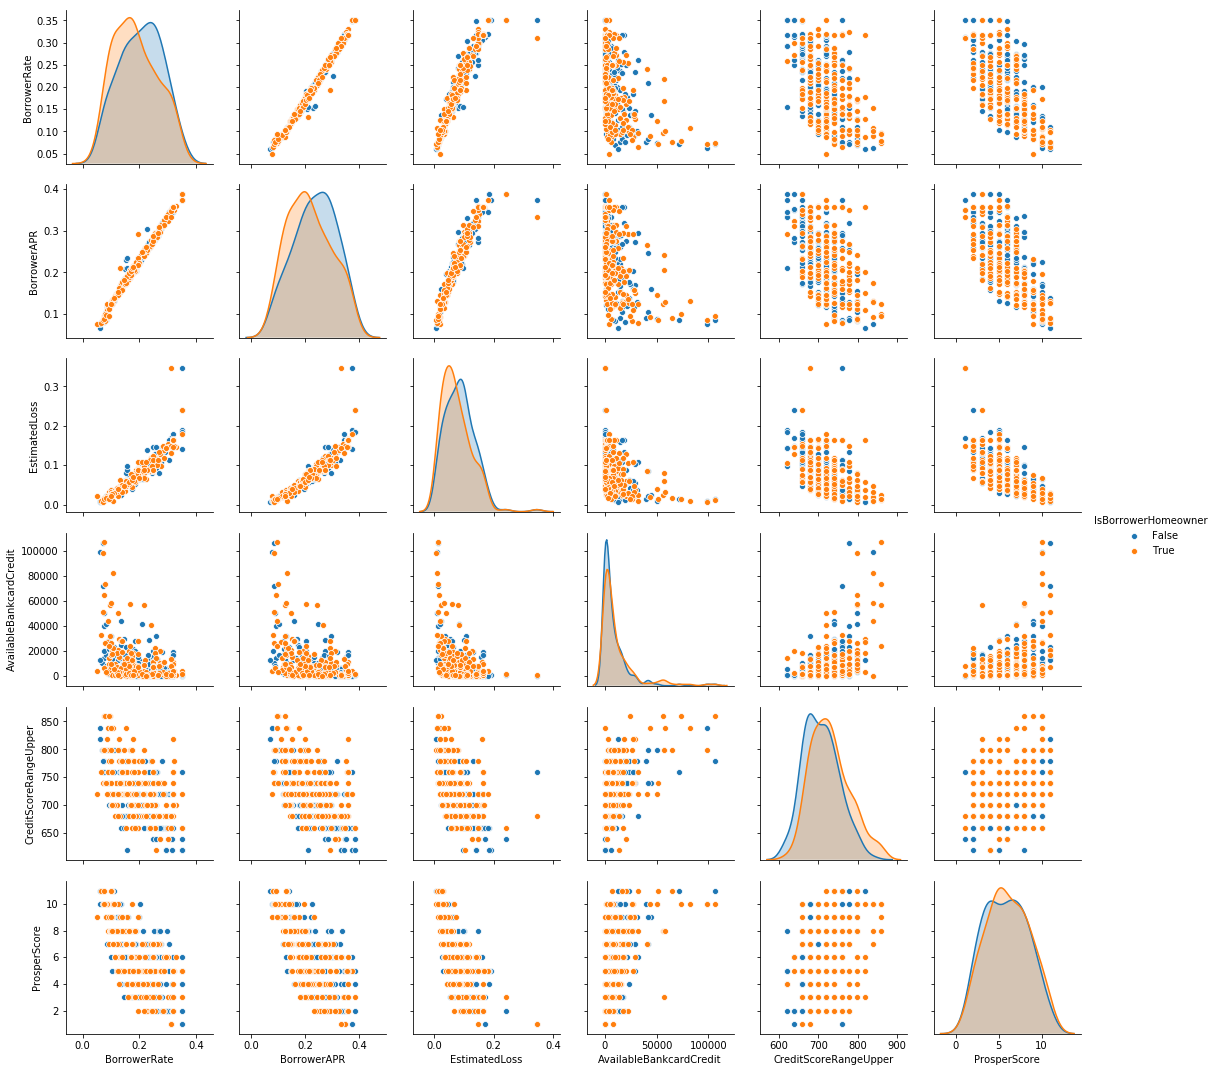

In [36]:
#Now we make a plot matrix to observe relationship between all the numeric variables seen in corelation plot above while also 
#using color encoding to incorporate another categoric variable: IsBorrowerHomeowner to show how data for homeowners & 
#non-homeowners compare

#Created a list of numeric variables only that need to be plotted to see direct relationship with other variables:
numeric_vars = ['BorrowerRate', 'BorrowerAPR', 'EstimatedLoss','AvailableBankcardCredit','CreditScoreRangeUpper','ProsperScore']

#As there are a lot of data points, taking a sample of the data to be able to observe trends more clearly:
samples = np.random.choice(df_new.shape[0], 500, replace = False)
sample_df = df_new.loc[samples,:]

#Create the Pairplot to see relationship between 6 numeric variables used in corelation plot and also 1 additional categoric variable:
sb.pairplot(sample_df, vars = numeric_vars, hue="IsBorrowerHomeowner");

#### Insights:
1. We can clearly observe relationships/trends which are analgous to the value of co-relation we observed for variables in the corelation heatmap above.
2. In this plot we have incorporated an additional categoric variable for Home Ownership in our analysis and we can observe a simillar trend for homeowners as well as non-homeowners.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Observed a relationship between employment status and home ownership from the multivariate analysis to see the effect on interest rate and available bank credit.
> It can be seen that employed borrowers who also own homes are considered to be financially sound (just as we would think logically) and are given loans more easily that too at lesser interest rates since they seem to also have higher amount of available bank credit than the unemployed borrowers who dont own homes!
> The reason for this could be that home owners can keep their house on mortgage (as a security), so that the loan amount can be recovered in case the borrower defaults to pay the loan in time!


> Additionally, from the corelation plot and plot matrix, could see that high interest rates are proportional and could lead to higher amount of losses, which maybe a reason that explains why interest rates are falling through the years!
